In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_diamonds = sns.load_dataset("diamonds")
data_exercise = sns.load_dataset("exercise")
data_titanic = sns.load_dataset("titanic")

In [13]:
data_exercise.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


Fase 2: Grafici Relazionali 
1. Utilizzate il dataset diamonds per creare uno scatterplot che mostri la relazione tra il peso in carati (carat) e il prezzo (price), differenziando i punti per tipo di taglio (hue).
2. Realizzate un lineplot del dataset exercise che visualizzi la variazione del battito cardiaco (pulse) nel tempo, differenziando tra i diversi tipi di dieta (hue).

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

valori mancanti trovati:
 carat      0
cut      

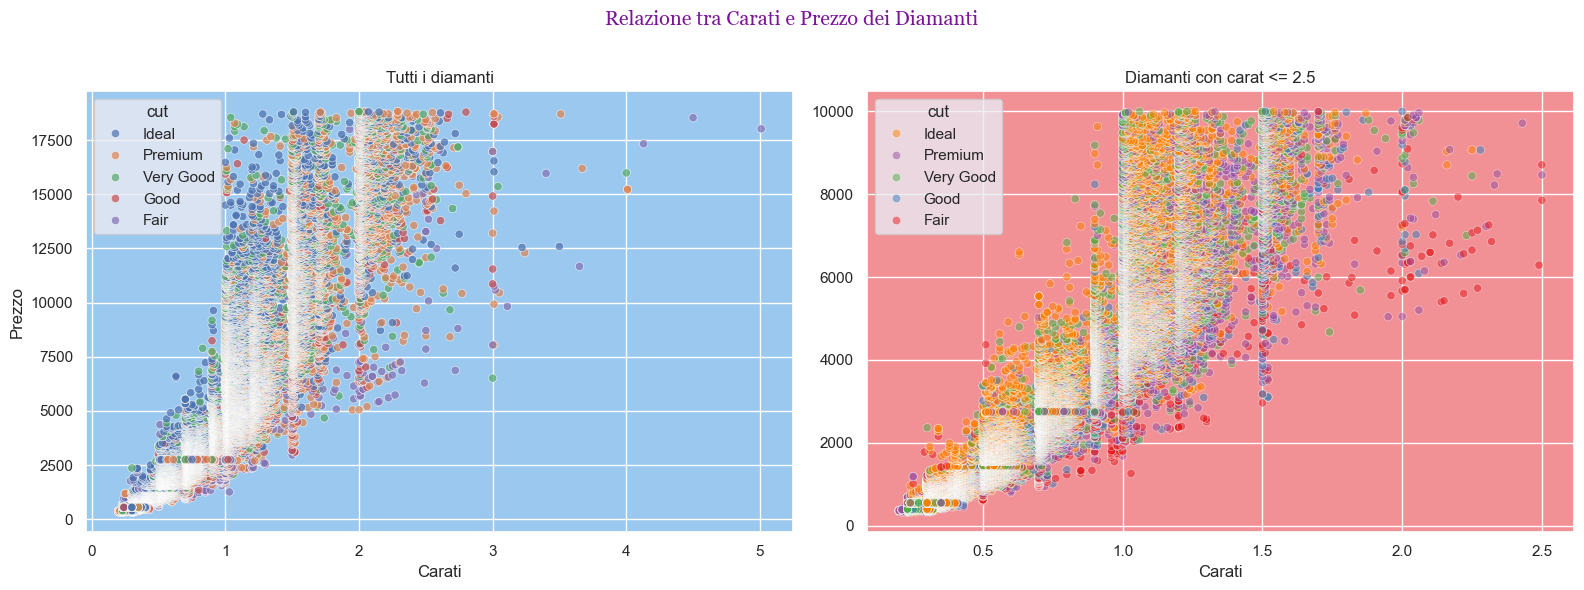

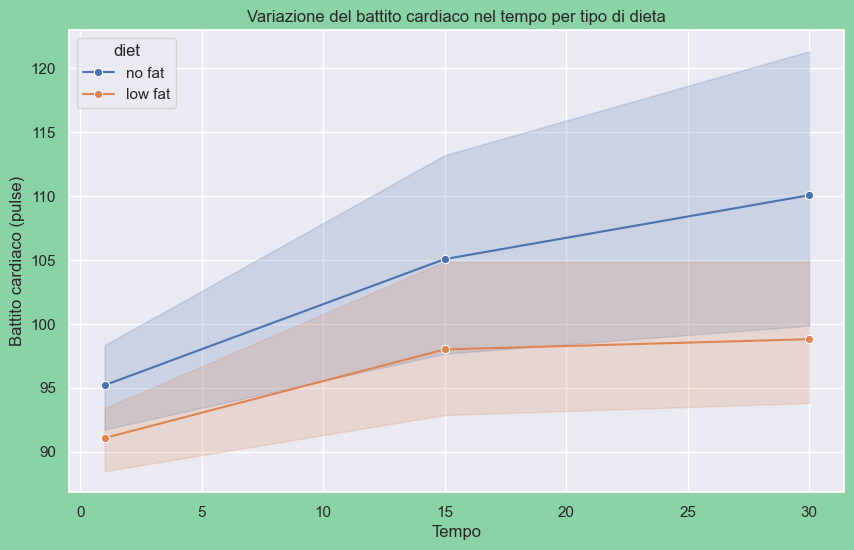

In [19]:
df = data_diamonds
print(df)
print("\nvalori mancanti trovati:\n", df.isnull().sum())
print(df.info())
font1 = {'family': 'georgia', 'color': "#7C1599", 'fontsize': 20}
myPalette = {
    'Fair': '#e41a1c',
    'Good': '#377eb8',
    'Very Good': '#4daf4a',
    'Premium': '#984ea3',
    'Ideal': '#ff7f00'
}

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].set_facecolor("#9AC8EE")
axes[1].set_facecolor("#F19095")

#Plot 1
sns.scatterplot(data=df, x='carat', y='price', hue='cut',
                alpha=0.7, ax=axes[0])
axes[0].set_title('Tutti i diamanti')
axes[0].set_xlabel('Carati')
axes[0].set_ylabel('Prezzo')
axes[0].grid(True)

#Plot 2 Solo carat < 2.5
df_small = df[(df['carat'] <= 2.5) & (df['price'] <= 10000)]
sns.scatterplot(data=df_small, x='carat', y='price', hue='cut',
                alpha=0.5, ax=axes[1], palette=myPalette)
axes[1].set_title('Diamanti con carat <= 2.5')
axes[1].set_xlabel('Carati')
axes[1].set_ylabel('')
axes[1].grid(True)

#titolo
fig.suptitle('Relazione tra Carati e Prezzo dei Diamanti', fontdict=font1)

#layout
plt.tight_layout(rect=[0, 0, 1, 0.97]) 
plt.show()
plt.figure(figsize=(10, 6),facecolor="#8ad3a6")
sns.lineplot(data=data_exercise, x='time', y='pulse', hue='diet', marker='o')
plt.title('Variazione del battito cardiaco nel tempo per tipo di dieta')
plt.xlabel('Tempo')
plt.ylabel('Battito cardiaco (pulse)')
plt.grid(True)
plt.show()

Fase 3: Grafici Categoriali 
1. Generate un barplot che mostri la media del prezzo dei diamanti (price) in base al tipo di taglio (cut) dal dataset diamonds.
2. Realizzate un violin plot con il dataset titanic per confrontare la distribuzione delle età (age) tra le diverse classi (class).

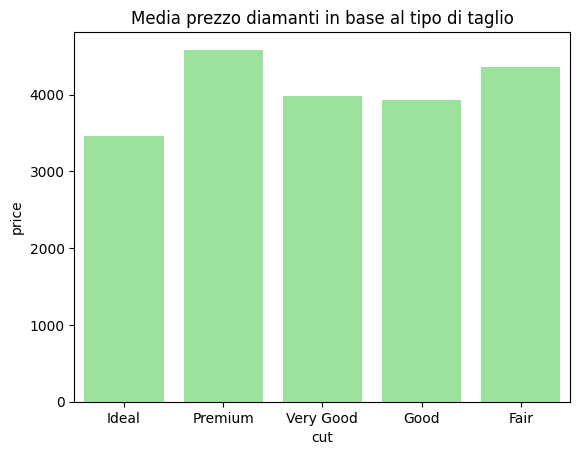

In [3]:
sns.barplot(x='cut', y='price', data=data_diamonds, estimator=np.mean, errorbar=None, color="lightgreen")
plt.title("Media prezzo diamanti in base al tipo di taglio")
plt.show()

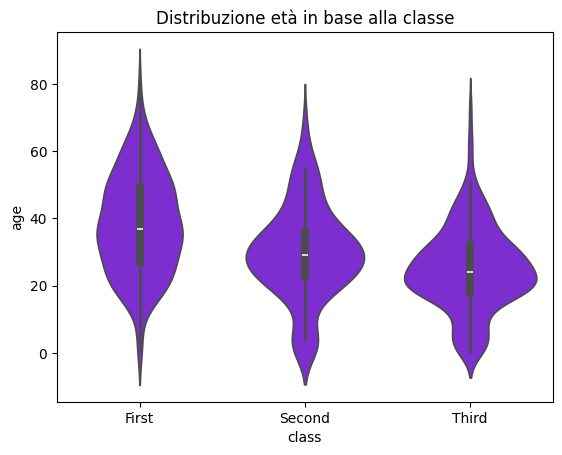

In [4]:
sns.violinplot(x='class', y='age', data=data_titanic, color ="#7B13EA")
plt.title("Distribuzione età in base alla classe")
plt.show()

Fase 4: Grafici di Distribuzione 
1. Create un histogram della variabile price dal dataset diamonds, aggiungendo anche una curva KDE.
2. Realizzate un pairplot del dataset exercise, utilizzando diet come parametro hue.


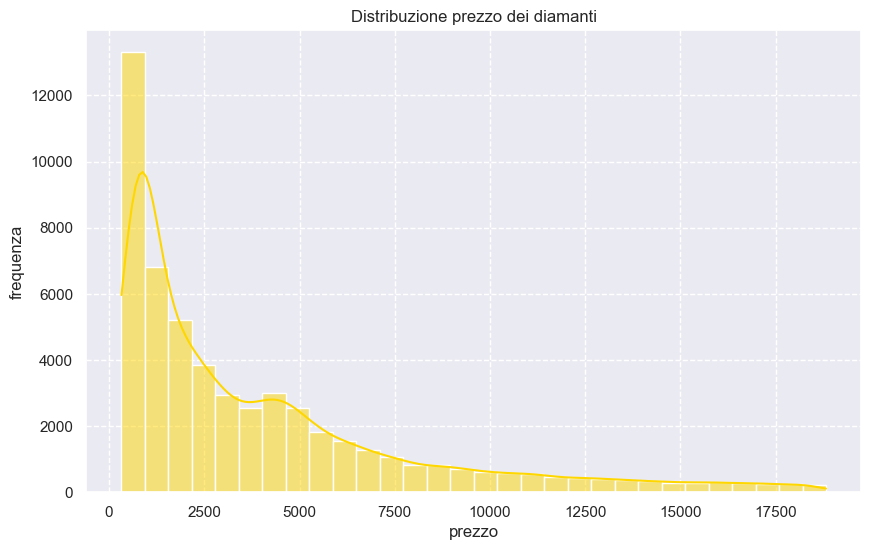

In [6]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")

sns.histplot(data=data_diamonds,
            x="price",
            kde=True, 
            bins=30,
            color="gold")
plt.title("Distribuzione prezzo dei diamanti")
plt.xlabel("prezzo")
plt.ylabel("frequenza")
plt.grid(True, linestyle='--')
plt.show()

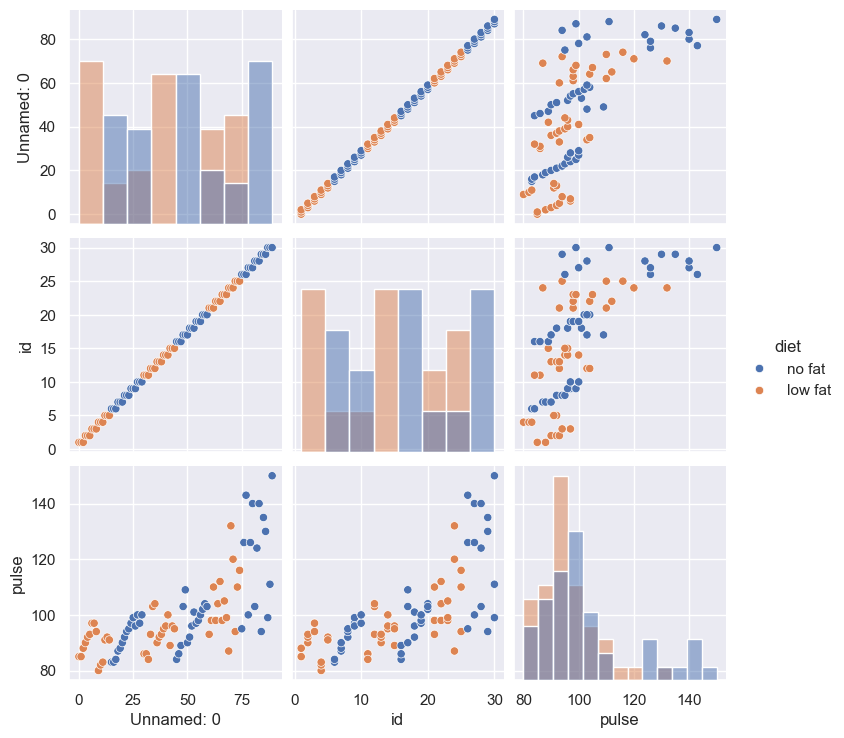

In [10]:
sns.pairplot(data_exercise, hue="diet", diag_kind="hist")
plt.show()

Fase 5: Grafici di Regressione 
1. Realizzate un regplot che visualizzi la relazione tra il peso (carat) e il prezzo (price) dal dataset diamonds.
2. Utilizzate lmplot per creare una regressione lineare separata per il sesso (sex) nel dataset exercise, confrontando il battito cardiaco (pulse) e il tempo di esercizio (time).

<function matplotlib.pyplot.show(close=None, block=None)>

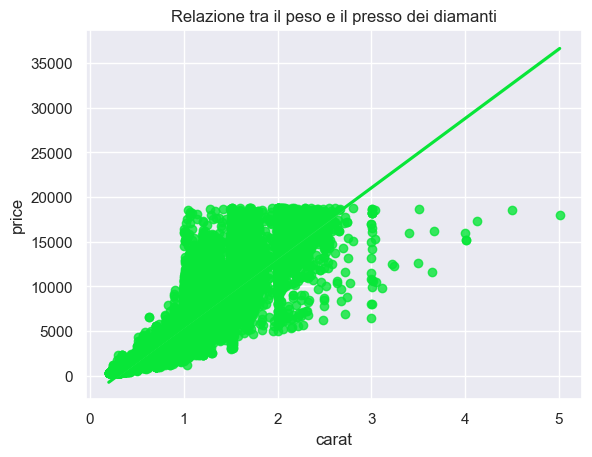

In [16]:
sns.regplot(x='carat', y='price', data=data_diamonds, color = "#08E638")
plt.title("Relazione tra il peso e il presso dei diamanti")
plt.show 

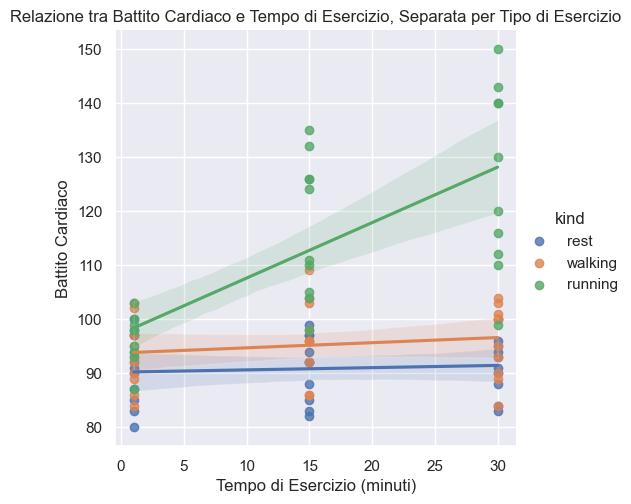

In [18]:
data_exercise['time'] = data_exercise['time'].astype(str).str.replace(' min', '').astype(float)
sns.lmplot(x='time', y='pulse', hue='kind', data=data_exercise)

plt.title('Relazione tra Battito Cardiaco e Tempo di Esercizio, Separata per Tipo di Esercizio')
plt.xlabel('Tempo di Esercizio (minuti)')
plt.ylabel('Battito Cardiaco')
plt.show()

Fase 6: Grafici Matriciali 
1. Calcolate e rappresentate visivamente tramite una heatmap la matrice di correlazione di tutte le variabili numeriche del dataset diamonds.
2. Realizzate una clustermap utilizzando il dataset titanic per identificare possibili raggruppamenti tra le variabili numeriche disponibili.

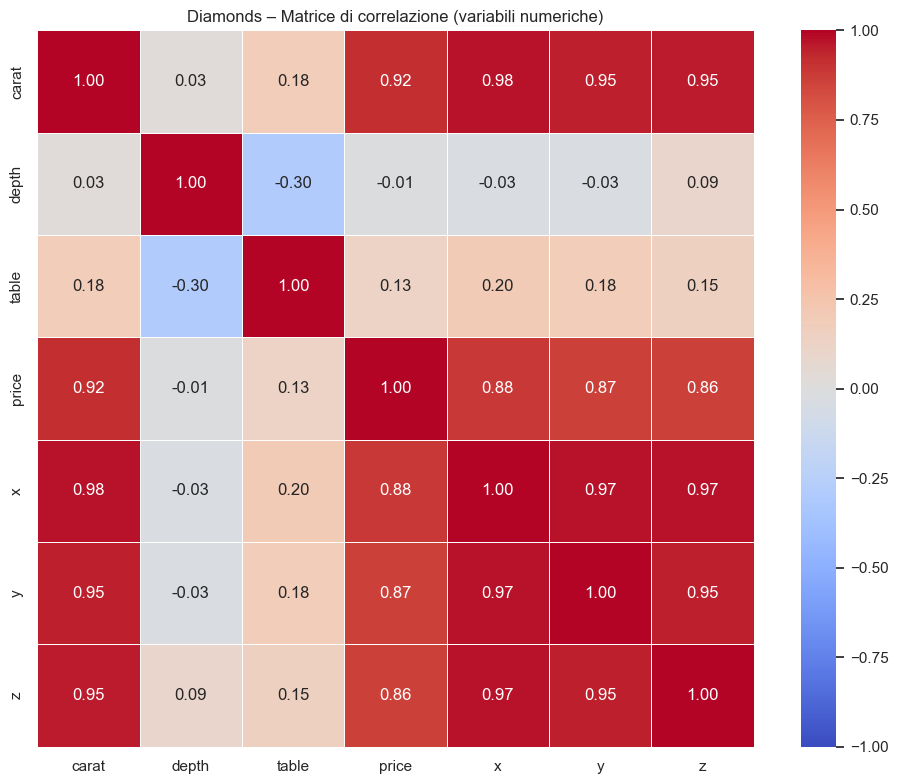

In [11]:
num_diamonds = data_diamonds.select_dtypes(include="number")
corr_diamonds = num_diamonds.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_diamonds,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    square=True,
    linewidths=.5
)
plt.title("Diamonds – Matrice di correlazione (variabili numeriche)")
plt.tight_layout()
plt.show()

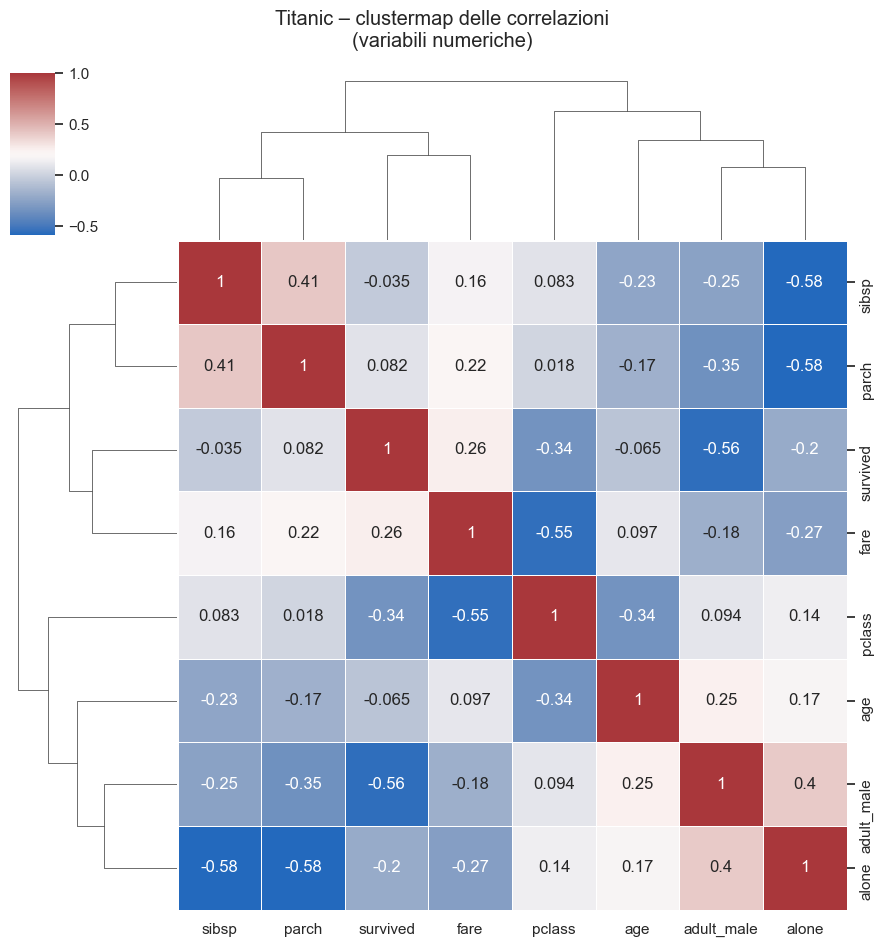

In [12]:
num_cols_titanic = data_titanic.select_dtypes(include=["int", "float", "bool"]).copy()


for col in num_cols_titanic.select_dtypes("bool").columns:
    num_cols_titanic[col] = num_cols_titanic[col].astype(int)

num_cols_titanic = num_cols_titanic.fillna(num_cols_titanic.median())

sns.clustermap(
    num_cols_titanic.corr(),
    annot=True,
    method="average",
    cmap="vlag",
    linewidths=.5,
    figsize=(9, 9)
)
plt.suptitle("Titanic – clustermap delle correlazioni\n(variabili numeriche)", y=1.05)
plt.show()